# TODO evolution not yet done

In [17]:
#! /usr/bin/env python

import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
def phi(x, y, L):
    """Edge function.
    Equals 1 on vertical edges (x = 0 or x = L);
    Equals 0 on horizontal edges (y = 0 or y = L).
    If on a corner, vertical edges take precedence (i.e. the function is 1)."""
    assert x == 0 or x == L or y == 0 or y == L  # the point is on one edge
    if x == 0 or x == L:
        return 1
    else:
        return 0



In [19]:
def value_on_point_reached(x, y, L):
    """x, y: integer coordinates of start point (in square [0,L-1]x[0,L-1]).
    L and K: see test().
    Simulate one random walk from the start point and return the value of the
    edge function when the edge is reached."""

    while  (x != 0 and x != L and y != 0 and y != L):  # while not on an edge
        rand = random.random()
        # Go with equal probability left, up, right or down
        if 0 <= rand < 0.25:
            x -= 1
        elif 0.25 <= rand < 0.5:
            x += 1
        elif 0.5 <= rand < 0.75:
            y -= 1
        else:
            y += 1
    # We have now reached an edge.
    return phi(x, y, L)



In [20]:
def monte_carlo(x, y, L, K):
    """Simulate K times on point (x, y) and return the average result."""
    sum = 0
    for _ in range(K):
        sum += value_on_point_reached(x, y, L)
    return sum/K



In [21]:
def approximate_solution(L, K):
    start = time.time()
    averages = np.zeros((L, L))
    for x in range(L):
        for y in range(L):
            averages[x][y] = monte_carlo(x, y, L, K)
    print("time L = {} K = {}: {:.2f}s".format(L, K, time.time() - start))
    return averages

In [22]:
def plot_approximate_solution(L, K):
    plt.imshow(approximate_solution(L, K).T, origin="lower",
               extent=[0, 1, 0, 1], cmap="jet")
    plt.show()


In [23]:
def test():
    """Main function."""
    L = 50  # discretize with squares of length 1/L
    K = 50  # number of simulations per point to compute the average result
    plot_approximate_solution(L, K)


time L = 50 K = 50 :  15.873189210891724


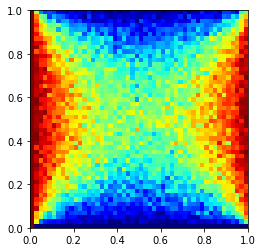

In [24]:
test()